# Benign vs Malignant tumors

This file identifies the factors that are significant in distinguishing benign and malignant tumors

## Import Modules & Read - Check Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [96]:
data = pd.read_csv('C:/Users/Ali/Documents/Insight/Data Challenge/data.txt', sep=",", header=None)
data.columns = ["id", "clump_thickness", "uniformity_cell_size", "uniformity_cell_shape", "adhesion", "Epithelial_Cell_Size","bare_nuclei","bland_chromatin","normal_nucleoli", "mitoses","class"]

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                       699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_size     699 non-null int64
uniformity_cell_shape    699 non-null int64
adhesion                 699 non-null int64
Epithelial_Cell_Size     699 non-null int64
bare_nuclei              699 non-null object
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
class                    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [98]:
data.describe()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,adhesion,Epithelial_Cell_Size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


bare_nuclei field seems to have non numeric rows. Check:

In [99]:
data['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

Remove records with missing values

In [100]:
df = data[data['bare_nuclei'] != '?']

In [101]:
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                       683 non-null int64
clump_thickness          683 non-null int64
uniformity_cell_size     683 non-null int64
uniformity_cell_shape    683 non-null int64
adhesion                 683 non-null int64
Epithelial_Cell_Size     683 non-null int64
bare_nuclei              683 non-null int64
bland_chromatin          683 non-null int64
normal_nucleoli          683 non-null int64
mitoses                  683 non-null int64
class                    683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


C:\Users\Ali\Anaconda3_Insight\envs\insight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,adhesion,Epithelial_Cell_Size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Boxplots may give an idea on outliers if any

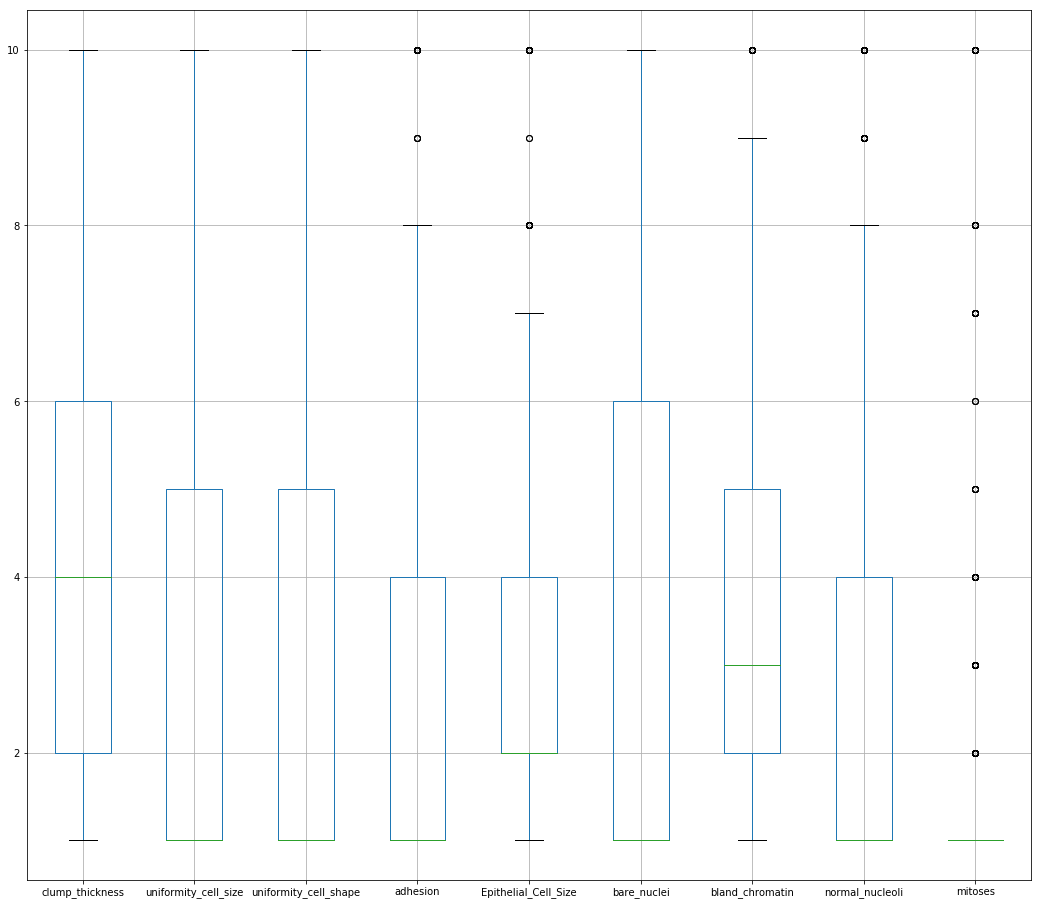

In [102]:
boxplot = df.boxplot(figsize=(18, 16),column=['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'adhesion', 'Epithelial_Cell_Size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses'])

Boxplots by groups indicate a difference across different independent variables

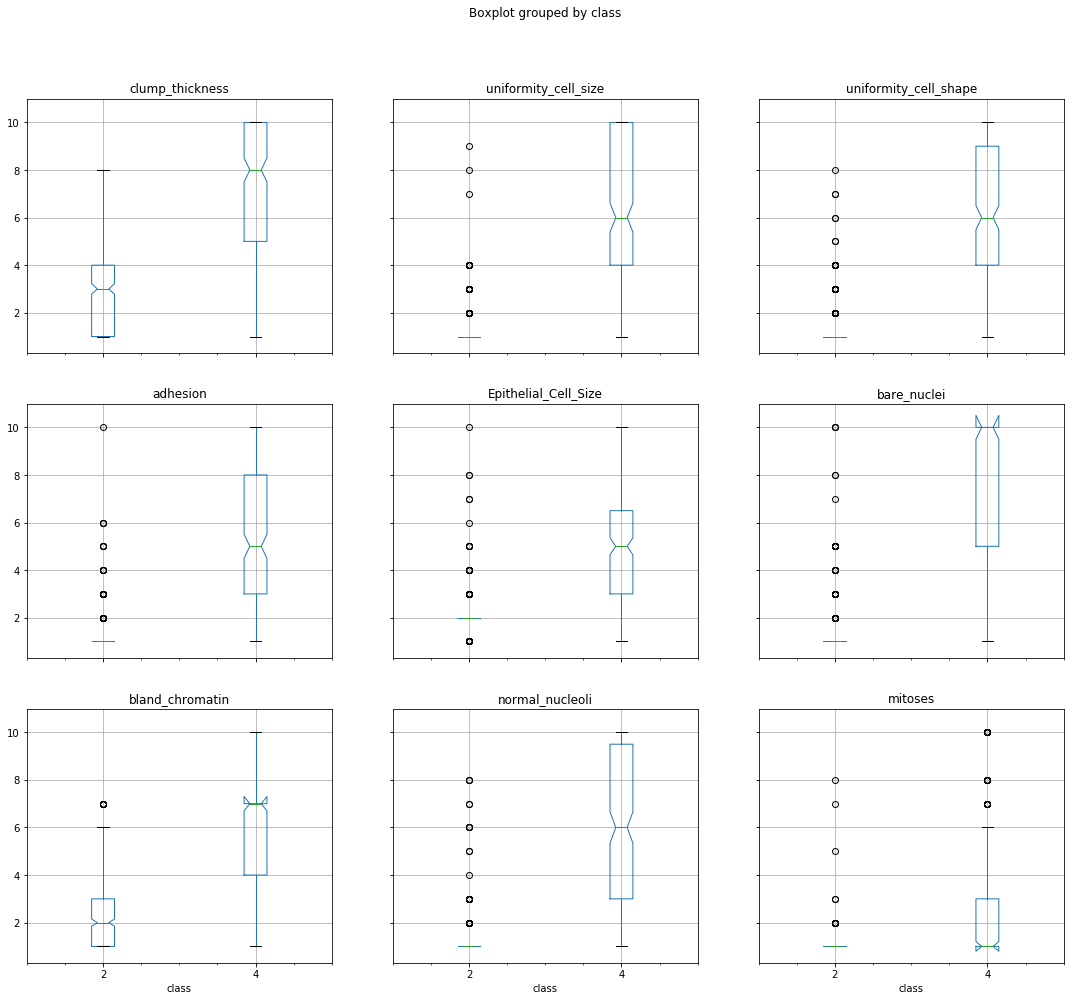

In [103]:
boxplot = df.boxplot(figsize=(18, 16), notch = True, column=['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'adhesion', 'Epithelial_Cell_Size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses'], by='class')

Although boxplots above suggest outliers, histograms belo show a skewed distribution. Thus the values beyond the IOC are not removed as outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A564A8F898>,
      dtype=object)

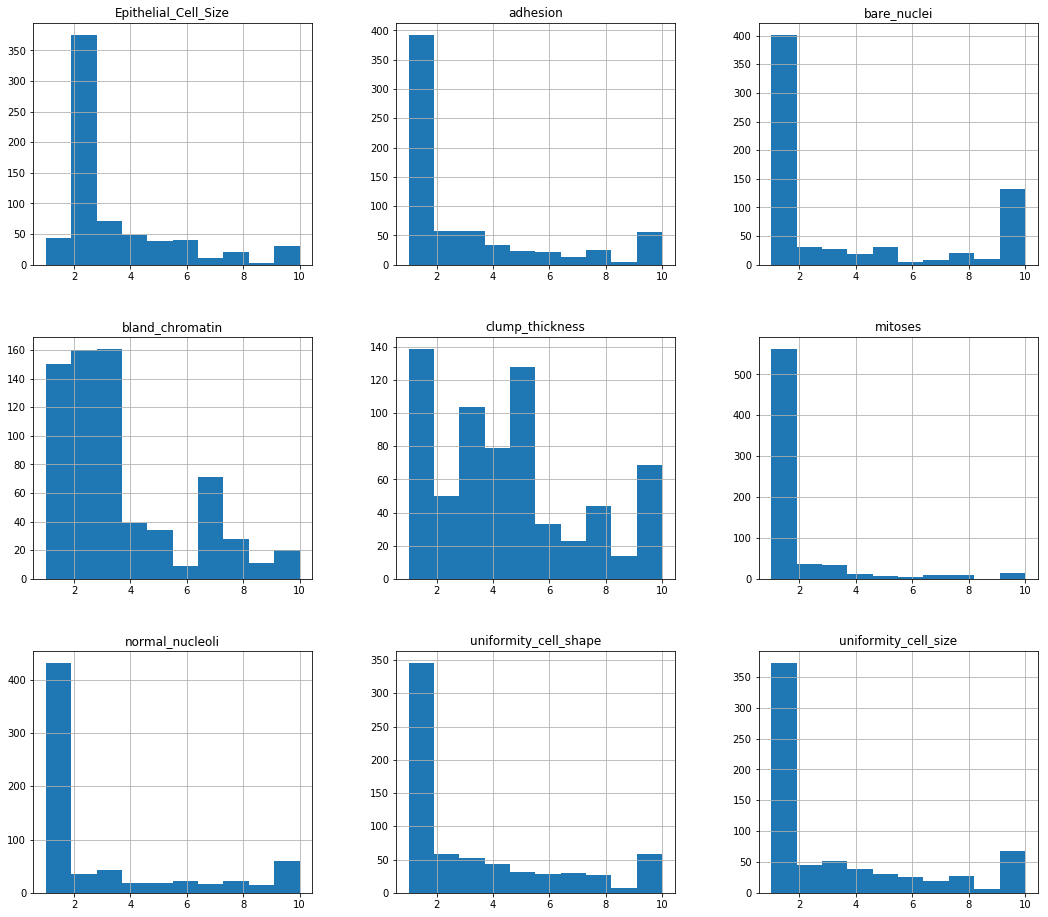

In [104]:
df[['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'adhesion', 'Epithelial_Cell_Size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']].hist(figsize=(18, 16))

Independent variables seem to have difference in terms of mean across benign / malignant timors.
Following bar charts suggest similar

In [105]:
df.groupby('class').mean()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,adhesion,Epithelial_Cell_Size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,,
2,1.115261e+06,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
4,1.005121e+06,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


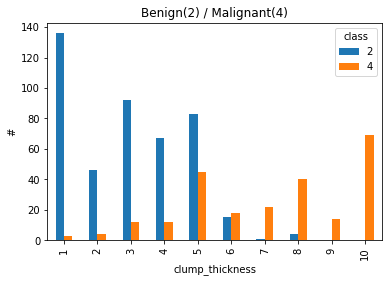

In [106]:
pd.crosstab(df['clump_thickness'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('clump_thickness')
plt.ylabel('#')
plt.show()

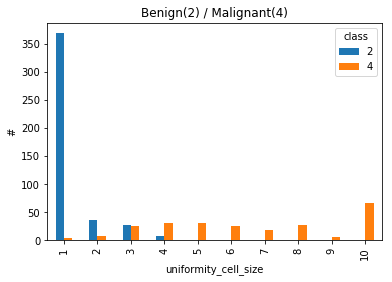

In [107]:
pd.crosstab(df['uniformity_cell_size'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('uniformity_cell_size')
plt.ylabel('#')
plt.show()

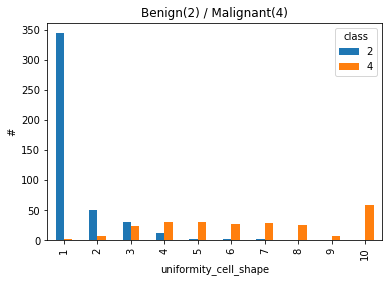

In [108]:
pd.crosstab(df['uniformity_cell_shape'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('uniformity_cell_shape')
plt.ylabel('#')
plt.show()

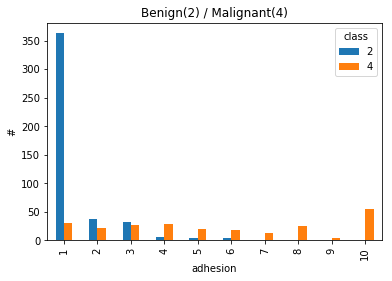

In [109]:
pd.crosstab(df['adhesion'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('adhesion')
plt.ylabel('#')
plt.show()

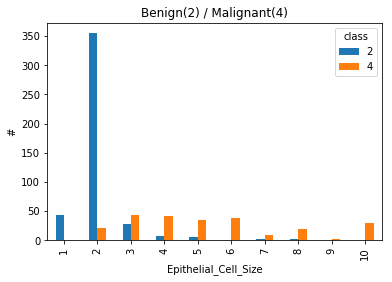

In [110]:
pd.crosstab(df['Epithelial_Cell_Size'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('Epithelial_Cell_Size')
plt.ylabel('#')
plt.show()

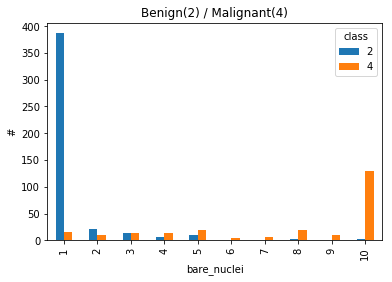

In [111]:
pd.crosstab(df['bare_nuclei'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('bare_nuclei')
plt.ylabel('#')
plt.show()

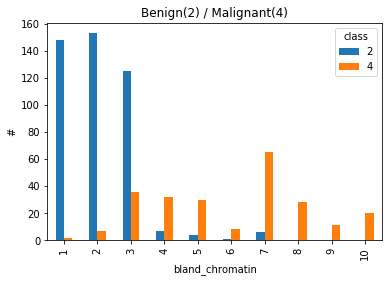

In [112]:
pd.crosstab(df['bland_chromatin'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('bland_chromatin')
plt.ylabel('#')
plt.show()

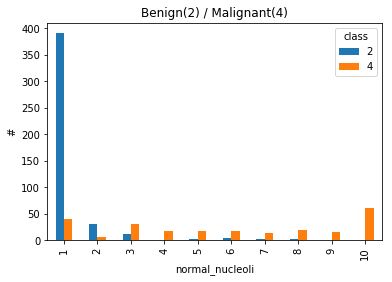

In [113]:
pd.crosstab(df['normal_nucleoli'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('normal_nucleoli')
plt.ylabel('#')
plt.show()

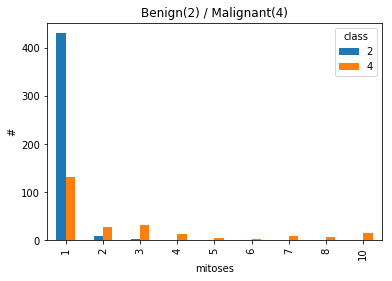

In [114]:
pd.crosstab(df['mitoses'], df['class']).plot(kind='bar')
plt.title('Benign(2) / Malignant(4)')
plt.xlabel('mitoses')
plt.ylabel('#')
plt.show()

In [115]:
# Statsmodel module to be used below takes 1-0 values for the target
df['class'].replace({2: 0, 4:1}, inplace=True)

C:\Users\Ali\Anaconda3_Insight\envs\insight\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [117]:
df['class'].unique()

array([0, 1], dtype=int64)

## Feature Selection

One option to refine features is to check whether they strongly correlate. While this holds true to a large extent, I avoid a method such as PCA as the resulting components are hard to interpret for someone not from the medicine field
As the features available are not limitless, I opt for checking their individual significance before coming up with the final model

In [130]:
x_data = df[['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'adhesion', 'Epithelial_Cell_Size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']]
target = df['class']
print(x_data.shape, target.shape)

(683, 9) (683,)


In [131]:
logit_model=sm.Logit(target,x_data)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.379649
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.414     
Dependent Variable:   class             AIC:               536.6002  
Date:                 2019-02-13 11:01  BIC:               577.3387  
No. Observations:     683               Log-Likelihood:    -259.30   
Df Model:             8                 LL-Null:           -442.18   
Df Residuals:         674               LLR p-value:       3.9252e-74
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
clump_thickness       -0.3513   0.0578 -6.0779 0.0000 -0.4645 -0.2380
uniformity_cell_

The p-values for most of the variables are smaller than 0.05, except 2: remove them.

In [132]:
x_data_simplified = df[['clump_thickness', 'uniformity_cell_size', 'Epithelial_Cell_Size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']]
logit_model=sm.Logit(target,x_data_simplified)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.384569
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.406     
Dependent Variable:  class             AIC:               539.3215  
Date:                2019-02-13 11:02  BIC:               571.0069  
No. Observations:    683               Log-Likelihood:    -262.66   
Df Model:            6                 LL-Null:           -442.18   
Df Residuals:        676               LLR p-value:       1.7779e-74
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
clump_thickness      -0.3236   0.0557 -5.8078 0.0000 -0.4328 -0.2144
uniformity_cell_size  1.0907

### Fit & Validate Model

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_data_simplified, target, test_size=0.25, random_state=0)

In [144]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\Ali\Anaconda3_Insight\envs\insight\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
y_pred = logisticRegr.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


Although accuracy is good, it is important to have a high recall ratio as missing truely malignant cases is undesirable

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       107
           1       0.93      0.86      0.89        64

   micro avg       0.92      0.92      0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



Dealing with datasets with heavy class imbalance such as this one, a classification score does not make much sense. Instead, Receiver Operating Characteristic or ROC curves offer a better alternative.

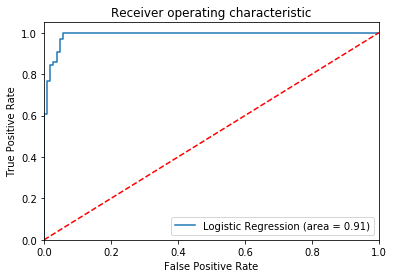

In [160]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
#plt.figsize=(1000, 1000)
plt.show()

As AUC (area) is close to 1, the model is performing well